# Real Estate Sales 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Missing values
# Outlier values
# Relationship between categorical and target feature
# Relationship between numerical and target feature
# Temporal features

In [5]:
data_frame=pd.read_csv('Real_Estate_Sales.csv')

In [6]:
data_frame.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,19029,2019,10/31/2019,Ansonia,23 ROBERT BARRY RD,202200.0,284000.0,0.7120,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.057015 41.33922)
1,190189,2019,04/07/2020,Avon,23 RIVER MEAD,134460.0,173800.0,0.7736,Condo,Condo,NaN,NaN,NaN,NaN
2,190352,2019,08/06/2020,Avon,204 LOVELY STREET,207450.0,317500.0,0.6534,Single Family,Single Family,NaN,NaN,NaN,POINT (-72.88939 41.800471)
3,190033,2019,12/03/2019,Beacon Falls,73 HILLVIEW STREET,111480.0,229900.0,0.4849,Single Family,Single Family,NaN,NaN,NaN,NaN
4,190056,2019,05/13/2020,Bethany,200 RUSSELL DR,323020.0,560000.0,0.5768,Single Family,Single Family,NaN,NaN,NaN,NaN


In [7]:
data_frame.shape

(930621, 14)

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930621 entries, 0 to 930620
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     930621 non-null  int64  
 1   List Year         930621 non-null  int64  
 2   Date Recorded     930619 non-null  object 
 3   Town              930621 non-null  object 
 4   Address           930570 non-null  object 
 5   Assessed Value    930621 non-null  float64
 6   Sale Amount       930621 non-null  float64
 7   Sales Ratio       930621 non-null  float64
 8   Property Type     925733 non-null  object 
 9   Residential Type  548176 non-null  object 
 10  Non Use Code      275231 non-null  object 
 11  Assessor Remarks  135512 non-null  object 
 12  OPM remarks       7946 non-null    object 
 13  Location          680517 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 99.4+ MB


In [9]:
data_frame.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.306210e+05,930621.000000,9.306210e+05,9.306210e+05,9.306210e+05
mean,2.251915e+05,2009.487847,2.759791e+05,3.758515e+05,1.113437e+01
std,3.317550e+06,5.857995,1.668465e+06,1.812805e+06,1.956649e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.035800e+04,2004.000000,8.659000e+04,1.375000e+05,4.872913e-01
50%,7.001200e+04,2009.000000,1.371200e+05,2.206700e+05,6.320792e-01
75%,1.409550e+05,2015.000000,2.232000e+05,3.563750e+05,7.953125e-01
max,1.710011e+09,2019.000000,8.815100e+08,3.955000e+08,1.226420e+06


In [10]:
data_frame['Sale Amount'].max()

395500000.0

## Finding missing values

In [11]:
data_frame.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type         4888
Residential Type    382445
Non Use Code        655390
Assessor Remarks    795109
OPM remarks         922675
Location            250104
dtype: int64

In [12]:
missing_values=pd.DataFrame({'Missing value count':data_frame.isnull().sum(),'Missing value percentage (%)':data_frame.isnull().sum()*100/len(data_frame)})

In [13]:
missing_values

,Missing value count,Missing value percentage (%)
Serial Number,0,0.000000
List Year,0,0.000000
Date Recorded,2,0.000215
Town,0,0.000000
Address,51,0.005480
Assessed Value,0,0.000000
Sale Amount,0,0.000000
Sales Ratio,0,0.000000
Property Type,4888,0.525241
Residential Type,382445,41.095677


## Checking the unique value counts

In [14]:
for cols in data_frame.columns:
    print('{} has {} unique values'.format(cols,len(data_frame[cols].unique())))

Serial Number has 74368 unique values
List Year has 19 unique values
Date Recorded has 6089 unique values
Town has 170 unique values
Address has 675679 unique values
Assessed Value has 87597 unique values
Sale Amount has 54984 unique values
Sales Ratio has 541743 unique values
Property Type has 18 unique values
Residential Type has 6 unique values
Non Use Code has 107 unique values
Assessor Remarks has 59586 unique values
OPM remarks has 3771 unique values
Location has 426205 unique values


In [15]:
unique_value_count=[]
unique_value_percentage=[]
for cols in data_frame.columns:
    count=len(data_frame[cols].unique())
    percentage=count*100/len(data_frame)
    unique_value_count.append(count)
    unique_value_percentage.append(percentage)

In [16]:
unique_values=pd.DataFrame({'Unique value count':unique_value_count,'Unique value percentage':unique_value_percentage},index=data_frame.columns)

In [17]:
unique_values

,Unique value count,Unique value percentage
Serial Number,74368,7.991223
List Year,19,0.002042
Date Recorded,6089,0.654294
Town,170,0.018267
Address,675679,72.605174
Assessed Value,87597,9.412747
Sale Amount,54984,5.908313
Sales Ratio,541743,58.213064
Property Type,18,0.001934
Residential Type,6,0.000645


In [18]:
missing_unique=pd.concat([missing_values,unique_values],axis=1)

In [19]:
missing_unique

,Missing value count,Missing value percentage (%),Unique value count,Unique value percentage
Serial Number,0,0.000000,74368,7.991223
List Year,0,0.000000,19,0.002042
Date Recorded,2,0.000215,6089,0.654294
Town,0,0.000000,170,0.018267
Address,51,0.005480,675679,72.605174
Assessed Value,0,0.000000,87597,9.412747
Sale Amount,0,0.000000,54984,5.908313
Sales Ratio,0,0.000000,541743,58.213064
Property Type,4888,0.525241,18,0.001934
Residential Type,382445,41.095677,6,0.000645


In [20]:
data_frame.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,19029,2019,10/31/2019,Ansonia,23 ROBERT BARRY RD,202200.0,284000.0,0.7120,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.057015 41.33922)
1,190189,2019,04/07/2020,Avon,23 RIVER MEAD,134460.0,173800.0,0.7736,Condo,Condo,NaN,NaN,NaN,NaN
2,190352,2019,08/06/2020,Avon,204 LOVELY STREET,207450.0,317500.0,0.6534,Single Family,Single Family,NaN,NaN,NaN,POINT (-72.88939 41.800471)
3,190033,2019,12/03/2019,Beacon Falls,73 HILLVIEW STREET,111480.0,229900.0,0.4849,Single Family,Single Family,NaN,NaN,NaN,NaN
4,190056,2019,05/13/2020,Bethany,200 RUSSELL DR,323020.0,560000.0,0.5768,Single Family,Single Family,NaN,NaN,NaN,NaN


In [21]:
data_frame['Non Use Code'].value_counts()

25 - Other                 55112
14 - Foreclosure           51519
07 - Change in Property    30491
7.0                        18863
08 - Part Interest         14490
                           ...  
32.0                           1
48.0                           1
38.0                           1
68.0                           1
37.0                           1
Name: Non Use Code, Length: 106, dtype: int64

In [22]:
# Finding outliers in numerical features.

<AxesSubplot:>

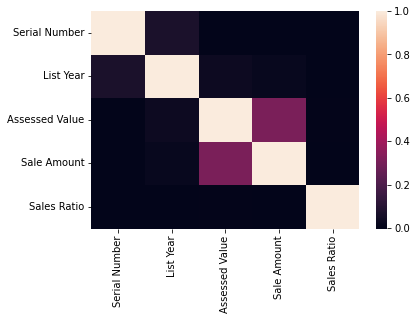

In [23]:
sns.heatmap(data_frame.corr())

## Finding the relationship between null values and target feature

In [24]:
missing_value_features=[]
for cols in data_frame.columns:
    if data_frame[cols].isnull().sum()>0:
        missing_value_features.append(cols)

In [25]:
data=data_frame[missing_value_features]

In [26]:
for cols in data.columns:
    data[cols]=np.where(data[cols].isnull(),1,0)

In [27]:
data

,Date Recorded,Address,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,0,0,0,0,1,1,1,0
1,0,0,0,0,1,1,1,1
2,0,0,0,0,1,1,1,0
3,0,0,0,0,1,1,1,1
4,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...
930616,0,0,0,0,1,1,1,0
930617,0,0,0,0,1,1,1,0
930618,0,0,0,1,0,0,1,1
930619,0,0,0,0,1,1,1,0


In [28]:
null_df=pd.concat([data,data_frame[['Sale Amount']]],axis=1).corr()

In [29]:
null_df.corr()

,Date Recorded,Address,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount
Date Recorded,1.000000,0.263417,-0.113885,-0.231003,-0.223786,-0.231032,-0.181736,-0.161183,-0.161505
Address,0.263417,1.000000,-0.082757,-0.218936,-0.247298,-0.233770,-0.183349,-0.168209,-0.162770
Property Type,-0.113885,-0.082757,1.000000,-0.020724,-0.307653,-0.328232,-0.206850,-0.043615,-0.092972
Residential Type,-0.231003,-0.218936,-0.020724,1.000000,-0.084132,0.195963,-0.079684,-0.056042,-0.162673
Non Use Code,-0.223786,-0.247298,-0.307653,-0.084132,1.000000,0.645681,0.030279,-0.289845,-0.169585
Assessor Remarks,-0.231032,-0.233770,-0.328232,0.195963,0.645681,1.000000,-0.121311,-0.253750,-0.216116
OPM remarks,-0.181736,-0.183349,-0.206850,-0.079684,0.030279,-0.121311,1.000000,-0.153812,-0.147097
Location,-0.161183,-0.168209,-0.043615,-0.056042,-0.289845,-0.253750,-0.153812,1.000000,-0.127329
Sale Amount,-0.161505,-0.162770,-0.092972,-0.162673,-0.169585,-0.216116,-0.147097,-0.127329,1.000000


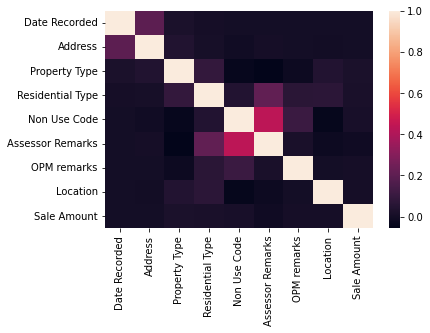

In [30]:
sns.heatmap(null_df);

There is no proper relationship between the null values and target feature. 

Remove Last 5 features from the data frame since, they have more number of null values.

In [31]:
final_df=data_frame.iloc[:,:-5]

In [32]:
final_df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type
0,19029,2019,10/31/2019,Ansonia,23 ROBERT BARRY RD,202200.0,284000.0,0.7120,Single Family
1,190189,2019,04/07/2020,Avon,23 RIVER MEAD,134460.0,173800.0,0.7736,Condo
2,190352,2019,08/06/2020,Avon,204 LOVELY STREET,207450.0,317500.0,0.6534,Single Family
3,190033,2019,12/03/2019,Beacon Falls,73 HILLVIEW STREET,111480.0,229900.0,0.4849,Single Family
4,190056,2019,05/13/2020,Bethany,200 RUSSELL DR,323020.0,560000.0,0.5768,Single Family
...,...,...,...,...,...,...,...,...,...
930616,1800046,2018,10/09/2018,Stamford,66 MAPLE TREE AVENUE # 5,145860.0,214350.0,0.6804,Residential
930617,180600,2018,05/20/2019,West Hartford,94 WESTGATE STREET,124320.0,176000.0,0.7063,Residential
930618,18297,2018,08/28/2019,Stafford,51 OLD SPRINGFIELD RD,1081710.0,37000.0,29.2354,Commercial
930619,18035,2018,11/02/2018,Ridgefield,44 STANDISH DR,474880.0,725000.0,0.6550,Residential


In [33]:
final_df.to_csv('modified_data.csv',index=False)